In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    import kid_readout
except ImportError:
    import sys
    sys.path.append('/home/gjones/kid_readout/')

In [3]:
import kid_readout.analysis.archive

no data directory set up for clouds defaulting to /data
Could not find any temperature log files in /data/readout/SRS/
updated file list


/home/gjones/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
pkls = kid_readout.analysis.archive.load_noise_pkl('/artemis/readout/pkl/2015-05-12_123322_mmw_noise_broadband.pkl')

In [5]:
snm = pkls[13+7*16]

In [6]:
snm.noise_measurement_freq_MHz

164.087646484375

In [7]:
snm.atten

29.0

In [8]:
snm.mmw_atten_turns

array([ 8.,  8.])

In [9]:
snm.resonator_index

13

/home/gjones/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


KeyError: 'Q_e_real'

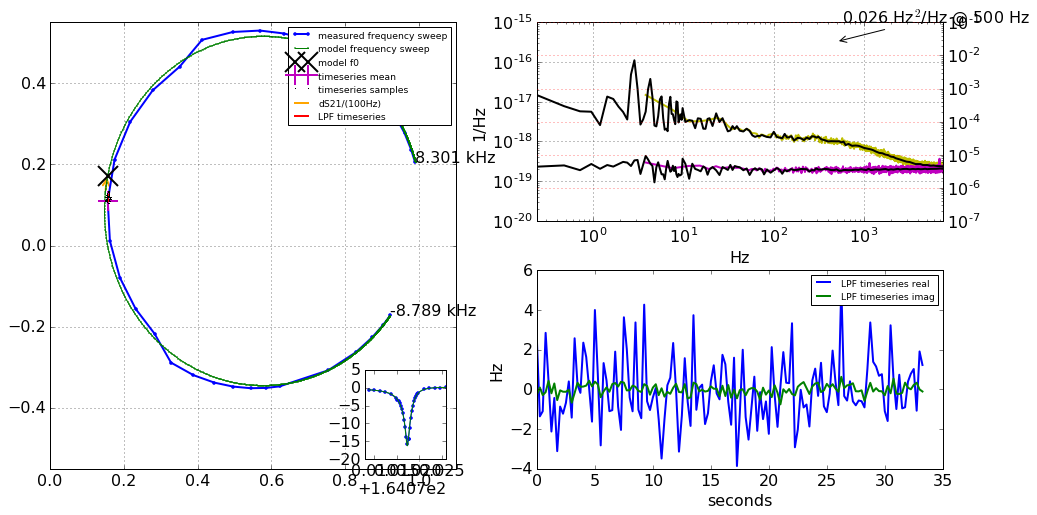

In [10]:
blah = snm.plot()

In [11]:
pxx,fr = mlab.psd(snm.fractional_fluctuation_timeseries.real,NFFT=2**10,Fs=snm.timeseries_sample_rate)
pii,fr = mlab.psd(snm.fractional_fluctuation_timeseries.imag,NFFT=2**10,Fs=snm.timeseries_sample_rate)

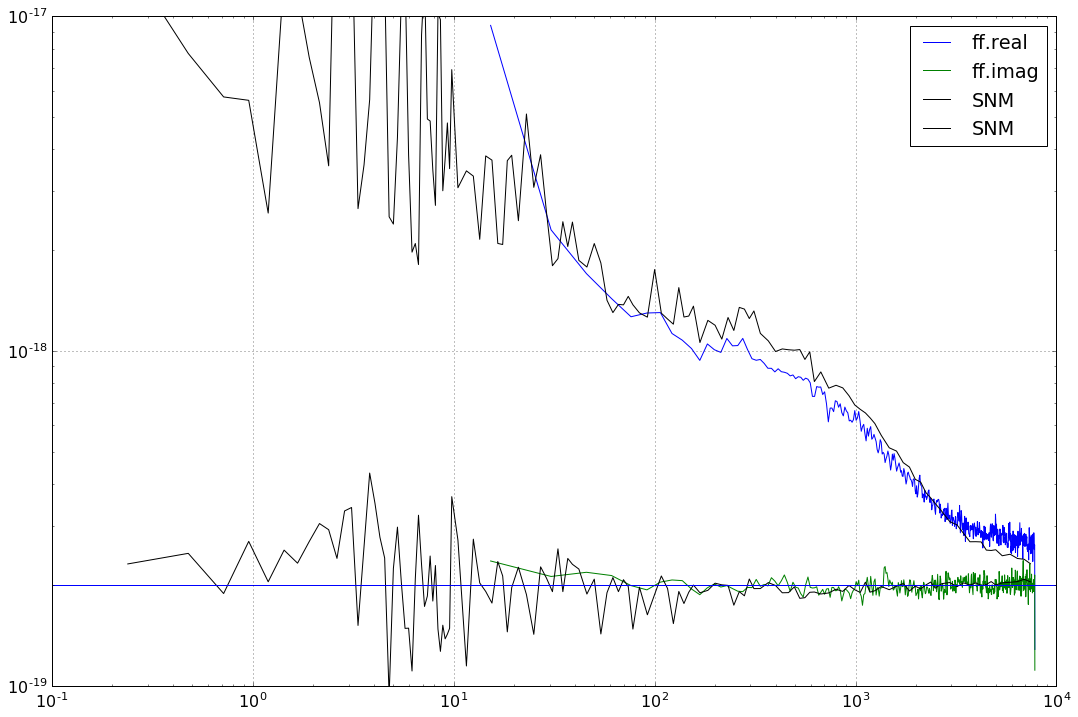

In [12]:
figure(figsize=(18,12))
loglog(fr,pxx,label='ff.real')
loglog(fr,pii,label='ff.imag')
loglog(snm.pca_freq,snm.pca_eigvals.T,label='SNM',color='k')
ylim(1e-19,1e-17)
gca().axhline(2e-19)
legend()
grid()

164.087646484
164.087890625
164.087890625


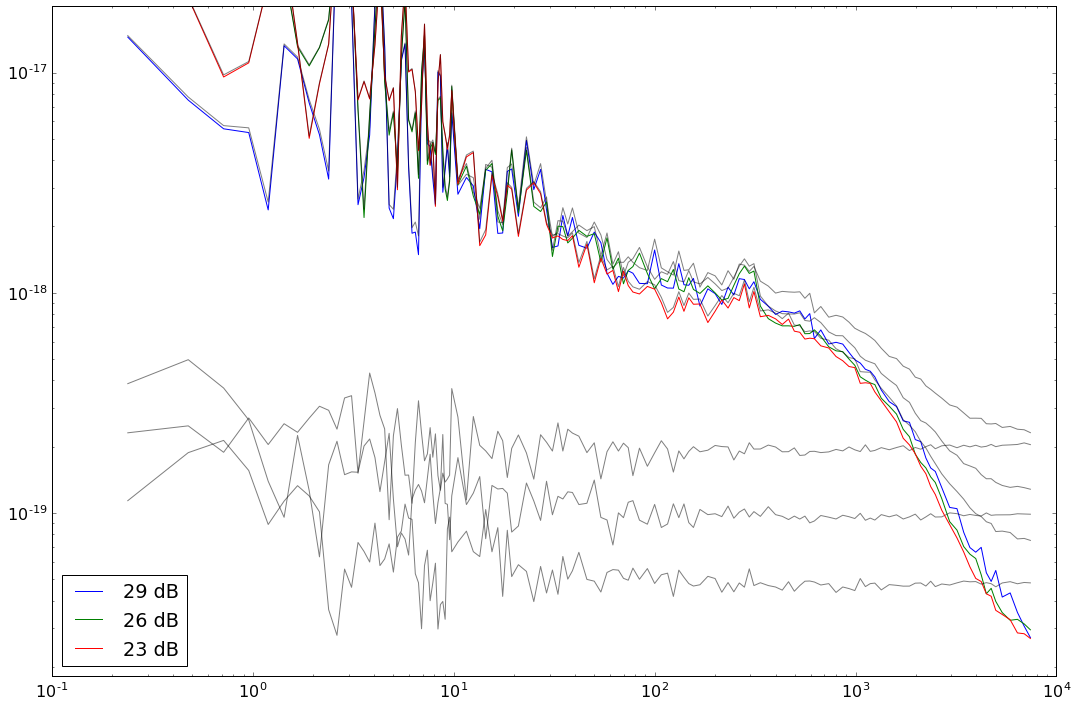

In [13]:
figure(figsize=(18,12))
for k in range(7,10):
    snm = pkls[13+16*k]
    loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:],label=('%d dB' % snm.atten))
    loglog(snm.pca_freq,snm.pca_eigvals.T,'k',alpha=0.5)
    print snm.noise_measurement_freq_MHz
ylim(0,2e-17)
#yscale('linear')
legend (loc='lower left')